<a href="https://colab.research.google.com/github/gullpet/dmlab/blob/master/Lab03-03/LabTopic3c_using_several_classifiers_nocode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using several classifiers and tuning parameters - Parameters grid
[From official `scikit-learn` documentation](http://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html)

Adapted by Claudio Sartori

Example of usage of the ***model selection*** features of `scikit-learn` and comparison of several classification methods.
1. import a sample dataset 
1. split the dataset into two parts: train and test
    - the *train* part will be used for training and validation (i.e. for *development*)
    - the *test* part will be used for test (i.e. for *evaluation*)
    - the fraction of test data will be _ts_ (a value of your choice between 0.2 and 0.5)
1. the function `GridSearchCV` iterates a cross validation experiment to train and test a model with different combinations of paramater values
    - for each parameter we set a list of values to test, the function will generate all the combinations
    - we choose a *score function* which will be used for the optimization
        - e.g. `accuracy_score`, `precision_score`, `cohen_kappa_score`, `f1_score`, see this [page](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) for reference
    - the output is a dictionary containing 
        - the set of parameters which maximize the score 
        - the test scores
1. prepare the parameters for the grid
    - it is a list of dictionaries
1. set the parameters by cross validation and the *score functions* to choose from
1. Loop on scores and, for each score, loop on the model labels (see details below)

In [2]:
"""
http://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html
@author: scikit-learn.org and Claudio Sartori
"""
import warnings
warnings.filterwarnings('ignore') # uncomment this line to suppress warnings

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

print(__doc__) # print information included in the triple quotes at the beginning

# Loading a standard dataset
#dataset = datasets.load_digits()
#dataset = datasets.fetch_olivetti_faces()
#dataset = datasets.fetch_covtype()
dataset = datasets.load_iris()
#dataset = datasets.load_wine()
#dataset = datasets.load_breast_cancer()


http://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html
@author: scikit-learn.org and Claudio Sartori



### Prepare the environment
The `dataset` module contains, among others, a few sample datasets.

See this [page](http://scikit-learn.org/stable/datasets/index.html) for reference

Prepare the data and the target in X and y. Set `ts`. Set the random state to 42

In [3]:
X = dataset.data
y = dataset.target
ts = 0.3
random_state = 42

Split the dataset into the train and test parts

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print("Training on", len(y_train), "samples")

Training on 112 samples


The code below is intended to ease the remainder of the exercise

In [5]:
model_lbls = [
              'dt', 
              'nb', 
              'lp', 
              'svc', 
             'knn',
             'adb',
             'rf',
            ]

# Set the parameters by cross-validation
tuned_param_dt = [{'max_depth': [*range(1,20)]}]
tuned_param_nb = [{'var_smoothing': [10, 1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-07, 1e-8, 1e-9, 1e-10]}]
tuned_param_lp = [{'early_stopping': [True]}]
tuned_param_svc = [{'kernel': ['rbf'], 
                    'gamma': [1e-3, 1e-4],
                    'C': [1, 10, 100, 1000],
                    },
                    {'kernel': ['linear'],
                     'C': [1, 10, 100, 1000],                     
                    },
                   ]
tuned_param_knn =[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}]
tuned_param_adb = [{'n_estimators':[20,30,40,50],
                   'learning_rate':[0.5,0.75,1,1.25,1.5]}]
tuned_param_rf = [{'max_depth': [*range(5,15)],
                   'n_estimators':[*range(10,100,10)]}]

models = {
    'dt': {'name': 'Decision Tree       ',
           'estimator': DecisionTreeClassifier(), 
           'param': tuned_param_dt,
          },
    'nb': {'name': 'Gaussian Naive Bayes',
           'estimator': GaussianNB(),
           'param': tuned_param_nb
          },
    'lp': {'name': 'Linear Perceptron   ',
           'estimator': Perceptron(),
           'param': tuned_param_lp,
          },
    'svc':{'name': 'Support Vector      ',
           'estimator': SVC(), 
           'param': tuned_param_svc
          },
    'knn':{'name': 'K Nearest Neighbor ',
           'estimator': KNeighborsClassifier(),
           'param': tuned_param_knn
       },
       'adb':{'name': 'AdaBoost           ',
           'estimator': AdaBoostClassifier(),
           'param': tuned_param_adb
          },
    'rf': {'name': 'Random forest       ',
           'estimator': RandomForestClassifier(),
           'param': tuned_param_rf
          }

}

scores = ['precision', 'recall']

### The function below groups all the outputs
Write a function which has as parameter the fitted model and uses the components of the fitted model to inspect the results of the search with the parameters grid.

The components are:<br>
`model.best_params_`<br>
`model.cv_results_['mean_test_score']`<br>`
model.cv_results_['std_test_score']`<br>
`model.cv_results_['params']`

The classification report is generated by the function imported above from sklearn.metrics, which takes as argument the true and the predicted test labels.

The +/- in the results is obtained doubling the `std_test_score`

The function will be used to print the results for each set of parameters

In [6]:
def print_results(model):
    print("Best parameters set found on train set:")
    print()
    # if best is linear there is no gamma parameter
    print(model.best_params_)
    print()
    print("Grid scores on train set:")
    print()
    means = model.cv_results_['mean_test_score']
    stds = model.cv_results_['std_test_score']
    params = model.cv_results_['params']
    for mean, std, params_tuple in zip(means, stds, params):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params_tuple))
    print()
    print("Detailed classification report for the best parameter set:")
    print()
    print("The model is trained on the full train set.")
    print("The scores are computed on the full test set.")
    print()
    y_true, y_pred = y_test, model.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

### Loop on scores and, for each score, loop on the model labels
- iterate varying the score function
    1. iterate varying the classification model among Decision Tree, Naive Bayes, Linear Perceptron, Support Vector, AdaBoost, Random Forest and KNN
        - activate the *grid search*
            1. the resulting model will be the best one according to the current score function
        - print the best parameter set and the results for each set of parameters using the above defined function
        - print the classification report
        - store the `.best score_` in a dictionary for a final report
    1. print the final report for the current *score funtion*

In [42]:
from sklearn.model_selection import GridSearchCV
import numpy as np

score_dict = {}

for label in model_lbls:
  print("Trying model", models[label]['name'])
  estimator = GridSearchCV(models[label]['estimator'], models[label]['param'], scoring='accuracy')
  estimator.fit(X_train, y_train)
  print_results(estimator)
  # strip of excess whitespaces
  label = label.strip()
  score_dict[models[label]['name']] = np.max(estimator.cv_results_['mean_test_score'])

print("FINAL REPORT")
print("-------------- Best scores --------------")
for label in score_dict.keys():
  if len(label) < 17:
    print(label + "\t\t:", score_dict[label])
  else:
    print(label + "\t:", score_dict[label])

Trying model Decision Tree       
Best parameters set found on train set:

{'max_depth': 6}

Grid scores on train set:

0.696 (+/-0.033) for {'max_depth': 1}
0.902 (+/-0.130) for {'max_depth': 2}
0.928 (+/-0.110) for {'max_depth': 3}
0.937 (+/-0.124) for {'max_depth': 4}
0.946 (+/-0.089) for {'max_depth': 5}
0.964 (+/-0.036) for {'max_depth': 6}
0.964 (+/-0.036) for {'max_depth': 7}
0.937 (+/-0.124) for {'max_depth': 8}
0.937 (+/-0.124) for {'max_depth': 9}
0.946 (+/-0.089) for {'max_depth': 10}
0.964 (+/-0.036) for {'max_depth': 11}
0.937 (+/-0.124) for {'max_depth': 12}
0.937 (+/-0.124) for {'max_depth': 13}
0.964 (+/-0.036) for {'max_depth': 14}
0.937 (+/-0.124) for {'max_depth': 15}
0.937 (+/-0.124) for {'max_depth': 16}
0.946 (+/-0.089) for {'max_depth': 17}
0.955 (+/-0.058) for {'max_depth': 18}
0.946 (+/-0.089) for {'max_depth': 19}

Detailed classification report for the best parameter set:

The model is trained on the full train set.
The scores are computed on the full test se

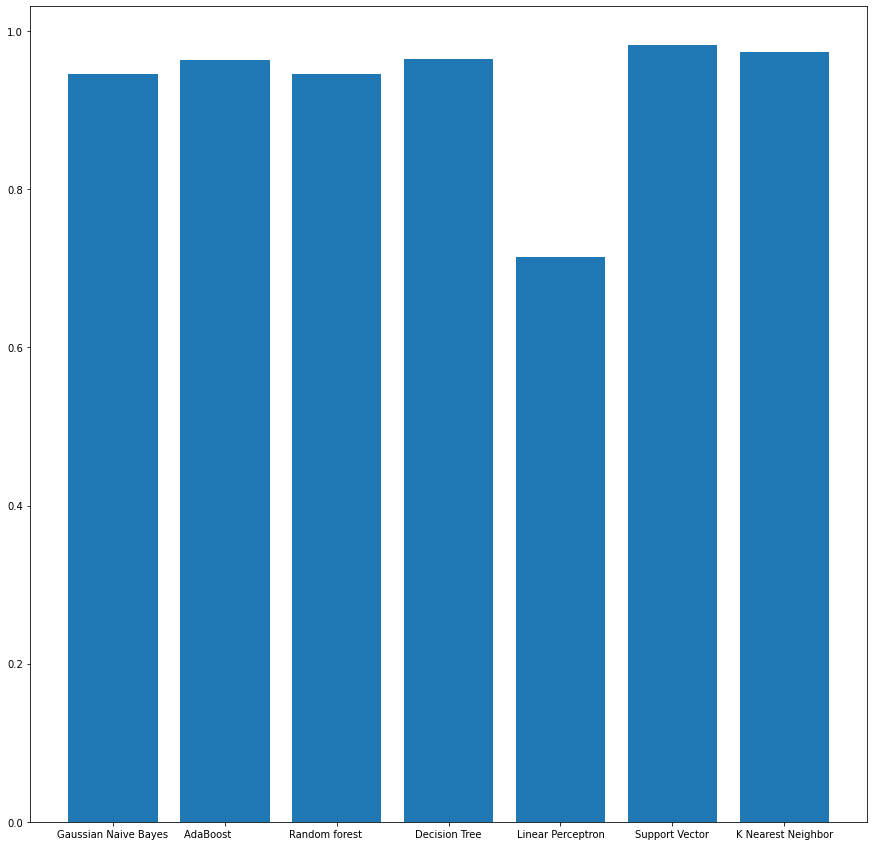

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
plt.bar(score_dict.keys(), score_dict.values())
plt.show()

In [39]:
print(len('Linear Perceptron'))

17
